<a href="https://colab.research.google.com/github/juhumkwon/Defense_Cloud/blob/main/2_matplotlib(%EC%8B%9C%EA%B0%81%ED%99%94).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#참고자료: https://greeksharifa.github.io/references/2023/05/12/matplotlib-usage/

from IPython import get_ipython
from IPython.display import display
# %%
from matplotlib import pyplot as plt
import numpy as np
import pandas as pd
from matplotlib import font_manager, rc
import matplotlib as mpl

# Install fonts-nanum for Korean fonts if not already installed
!apt-get update -qq
!apt-get install -y fonts-nanum

# Instead of using the private _rebuild function, clear the font cache
# using the public font_manager.fontManager.addfont method to add the Korean fonts.
font_dirs = ['/usr/share/fonts/truetype/nanum', ]
font_files = font_manager.findSystemFonts(fontpaths=font_dirs)

for font_file in font_files:
    font_manager.fontManager.addfont(font_file)


# Set the font to NanumGothic (or other Korean font from fonts-nanum)
font_name = 'NanumGothic'
rc('font', family=font_name)



W: Skipping acquire of configured file 'main/source/Sources' as repository 'https://r2u.stat.illinois.edu/ubuntu jammy InRelease' does not seem to provide it (sources.list entry misspelt?)
Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
The following NEW packages will be installed:
  fonts-nanum
0 upgraded, 1 newly installed, 0 to remove and 54 not upgraded.
Need to get 10.3 MB of archives.
After this operation, 34.1 MB of additional disk space will be used.
Get:1 http://archive.ubuntu.com/ubuntu jammy/universe amd64 fonts-nanum all 20200506-1 [10.3 MB]
Fetched 10.3 MB in 1s (12.3 MB/s)
Selecting previously unselected package fonts-nanum.
(Reading database ... 123634 files and directories currently installed.)
Preparing to unpack .../fonts-nanum_20200506-1_all.deb ...
Unpacking fonts-nanum (20200506-1) ...
Setting up fonts-nanum (20200506-1) ...
Processing triggers for fontconfig (2.13.1-4.2ubuntu5) ...


In [ ]:

data = pd.DataFrame(data={
    'A': [1, 4, 3, 6, 5, 8, 7, 9],
    'B': [6, 5, 7, 8, 9, 9, 8, 9],
    'C': [8.8, 7.7, 6.6, 5.5, 4.4, 3.3, 2.2, 1.1]
})


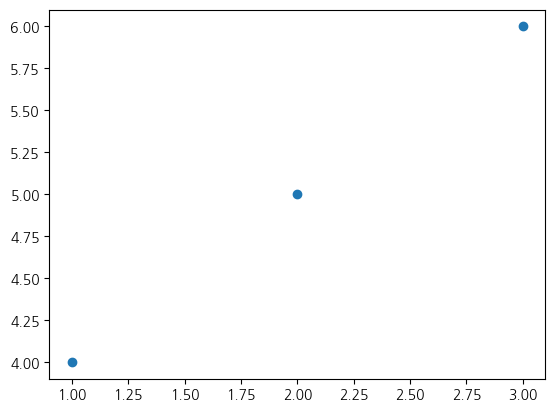

In [ ]:
# 산점도(scatter)

plt.scatter(x=[1,2,3], y=[4,5,6])

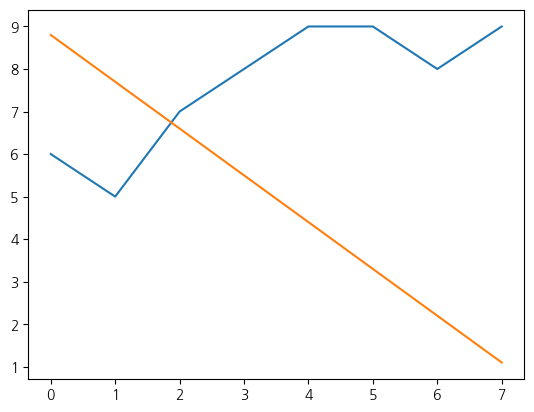

In [ ]:
plt.plot(data.index, data['B'])
# 하나만 입력하면 기본 index로 그려진다.
plt.plot(data['C'])

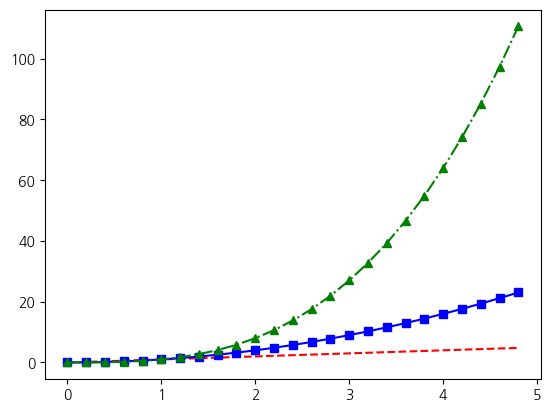

In [ ]:
# 한 번의 plot() 호출로 여러 개를 그릴 수 있다. 순서는 x, y, fmt 순으로 입력할 수 있다.
t = np.arange(0., 5., 0.2)
plt.plot(t, t, 'r--', t, t**2, 'bs-', t, t**3, 'g^-.')

<ipython-input-52-c61bb48b414c>:4: RuntimeWarning: Second argument 'y' is ambiguous: could be a format string but is in 'data'; using as data.  If it was intended as data, set the format string to an empty string to suppress this warning.  If it was intended as a format string, explicitly pass the x-values as well.  Alternatively, rename the entry in 'data'.
  plt.plot('x', 'y', data=data_dict)


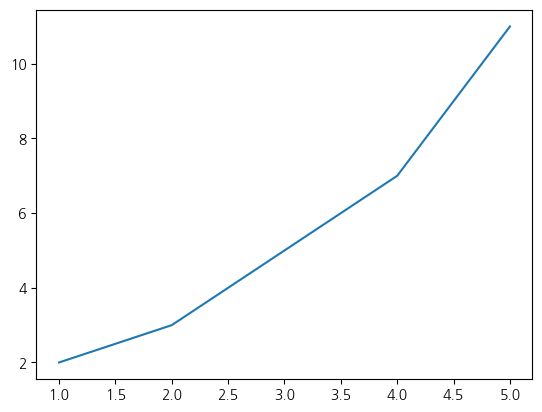

In [ ]:
# plot()은 list나 DataFrame뿐 아니라 dictionary도 그래프로 나타낼 수 있다.

data_dict = {'x': [1, 2, 3, 4, 5], 'y': [2, 3, 5, 7, 11]}
plt.plot('x', 'y', data=data_dict)

<BarContainer object of 8 artists>

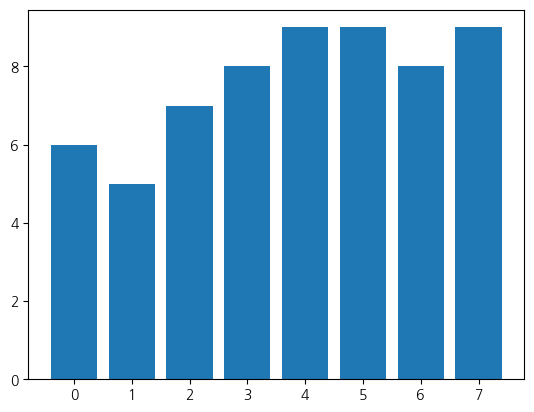

In [ ]:
plt.bar(data.index, data['B'])

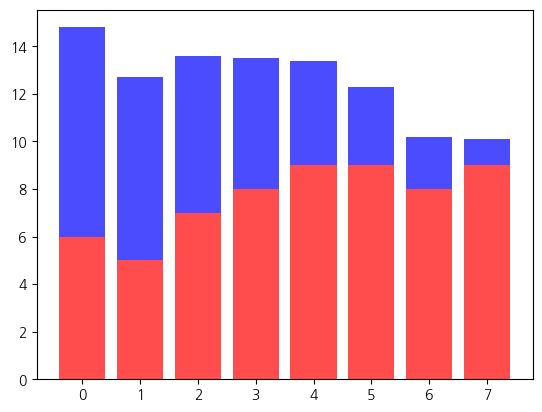

In [ ]:
# stack해서 사용하는 방법은 다음과 같이 bottom 옵션을 사용한다.

p1 = plt.bar(data.index, data['B'], color='red', alpha=0.7)
p2 = plt.bar(data.index, data['C'], color='blue', alpha=0.7, bottom=data['B'])
# plot이 여러 개인 경우 plt.legend()는 그냥 넣으면 legend가 출력되지 않는다.


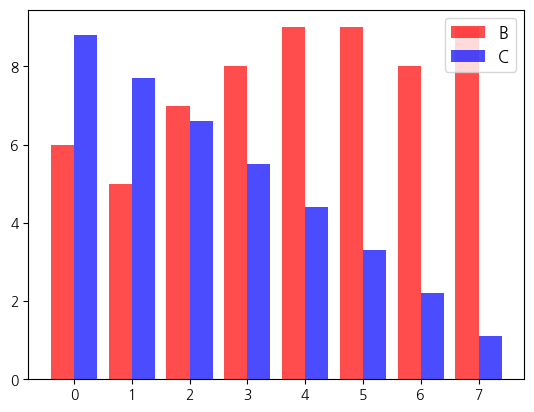

In [ ]:
# 나란히 놓는 방법은 bar의 width 옵션과 x좌표를 조정하면 된다.

p1 = plt.bar(data.index-0.2, data['B'], color='red', alpha=0.7, width=0.4)
p2 = plt.bar(data.index+0.2, data['C'], color='blue', alpha=0.7, width=0.4)
plt.legend((p1, p2), ('B', 'C'), fontsize=12)

{'whiskers': [<matplotlib.lines.Line2D at 0x7b8e3625a6e0>,
 'caps': [<matplotlib.lines.Line2D at 0x7b8e3625ac20>,
 'boxes': [<matplotlib.lines.Line2D at 0x7b8e3625a440>],
 'medians': [<matplotlib.lines.Line2D at 0x7b8e3625b160>],
 'fliers': [<matplotlib.lines.Line2D at 0x7b8e3625b400>],
 'means': []}

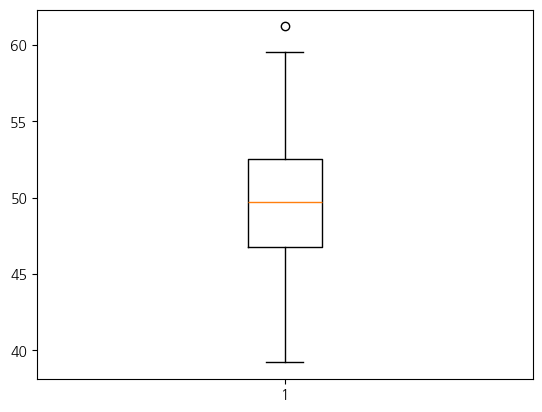

In [ ]:
# boxplot
x = np.random.normal(50, 5, 100)
plt.boxplot(x)

([<matplotlib.axis.XTick at 0x7b8e362a40d0>,
 [Text(1, 0, 'x1'), Text(2, 0, 'x2')])

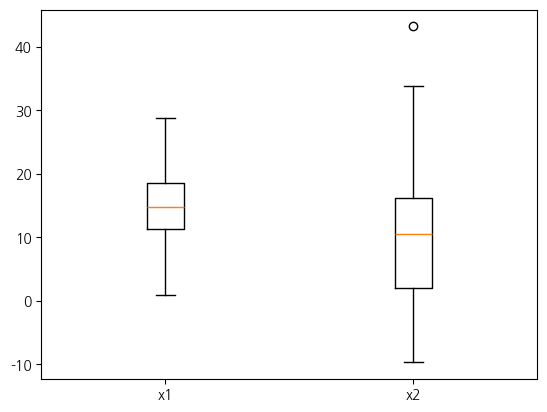

In [ ]:
# 여러 boxplot을 한 번에 그리려면 리스트에 담아서 전달한다.

x1 = np.random.normal(15, 5, 500)
x2 = np.random.normal(10, 10, 100)
plt.boxplot([x1, x2])
plt.xticks([1, 2], ["x1", "x2"])

(array([ 3.,  7., 14., 10., 21., 17., 15.,  6.,  3.,  4.]),
 array([ 5.12577514,  6.13015287,  7.13453059,  8.13890832,  9.14328605,
        10.14766377, 11.1520415 , 12.15641923, 13.16079695, 14.16517468,
        15.16955241]),
 <BarContainer object of 10 artists>)

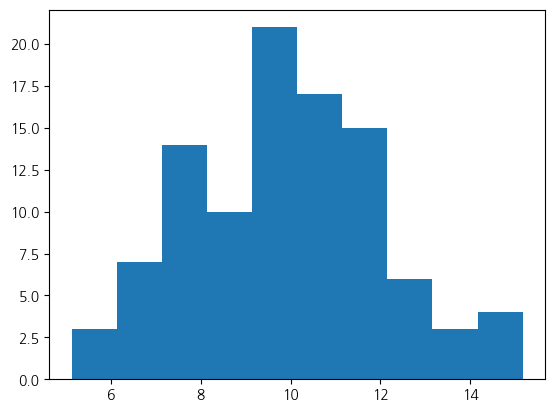

In [ ]:
# Histogram
# 구간 개수는 bins으로 설정한다.

x = np.random.normal(10, 2, 100)
plt.hist(x, bins=10)

<Axes: >

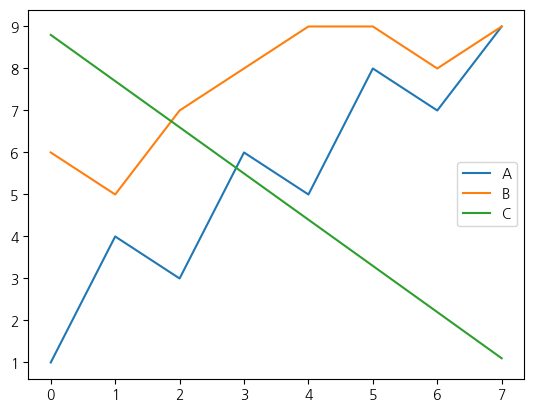

In [ ]:
# pd.DataFrame.plot
# pandas의 dataframe에서 .plot() method를 호출하면 바로 그래프를 그릴 수 있다.
# 종류는 line, bar, barh, hist, box, scatter 등이 있다. barh는 수평 막대 그래프를 의미한다.

data.plot(kind='line')

<Axes: >

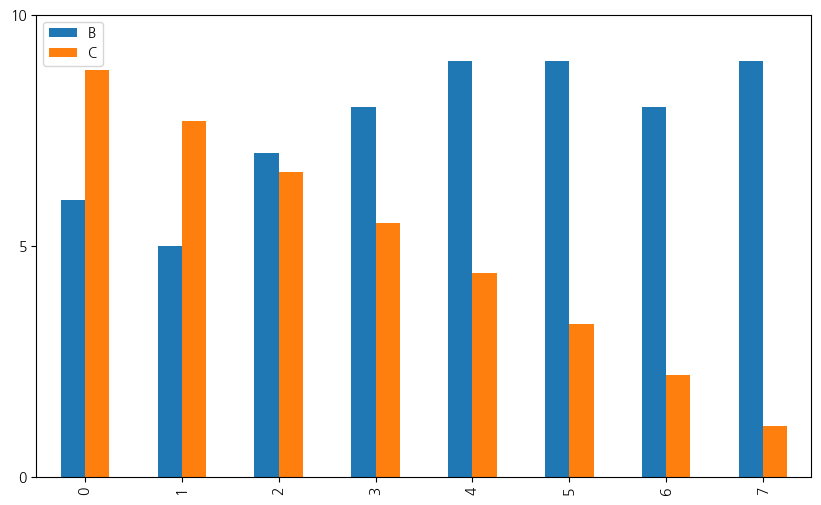

In [ ]:
data.plot(kind = "bar", y = ["B", "C"], figsize = (10, 6),
    yticks=[0, 5, 10])

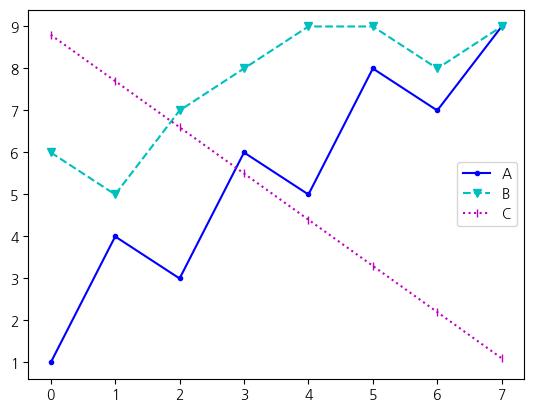

In [ ]:
# format string(fmt)
# 색상, 마커, 선 스타일을 쉽게 지정할 수 있다.

plt.plot(data['A'], 'b.-', label='A')
plt.plot(data['B'], 'cv--', label='B')
plt.plot(data['C'], 'm|:', label='C')
plt.legend()

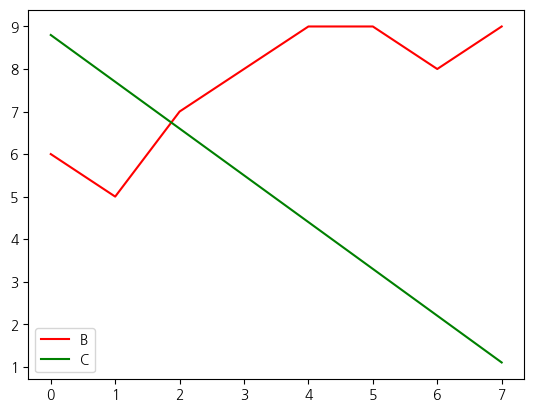

In [ ]:
# 색상(color)

plt.plot(data['B'], label='B', color='red')
plt.plot(data['C'], label='C', color='green')
plt.legend()

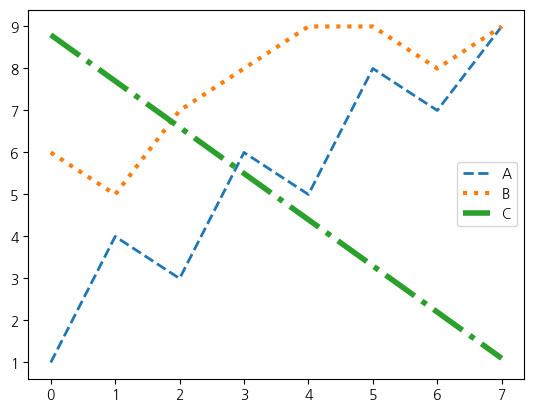

In [ ]:
"""
선 스타일(linestyle), 두께(linewidth)
선 스타일은 linestyle parameter를 전달하며 기본값인 solid와 dashed, dotted, dashdot이 있다.
선 두께는 linewidth로 설정하고 기본값은 1.5이다.
"""

plt.plot(data['A'], label='A', linestyle='dashed', linewidth=2)
plt.plot(data['B'], label='B', linestyle='dotted', linewidth=3)
plt.plot(data['C'], label='C', linestyle='dashdot', linewidth=4)
plt.legend()

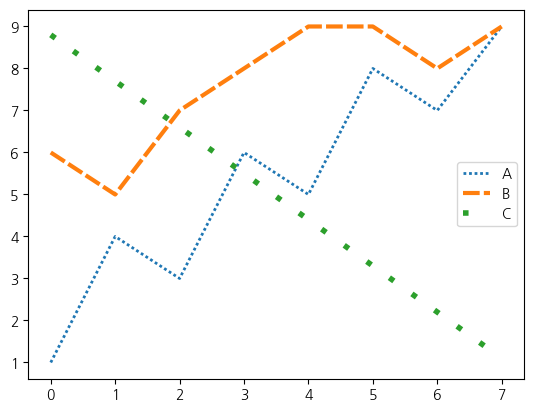

In [ ]:
# 수치로 직접 지정할 수 있다. 참고로 (0, (1, 1))은 dotted, (0, (5, 5))는 dashed, (0, (3, 5, 1, 5))는 dashdot과 같다.

plt.plot(data['A'], label='A', linestyle=(0, (1,1)), linewidth=2)
plt.plot(data['B'], label='B', linestyle=(0, (4,1)), linewidth=3)
plt.plot(data['C'], label='C', linestyle=(0, (1,4)), linewidth=4)
plt.legend()

<BarContainer object of 8 artists>

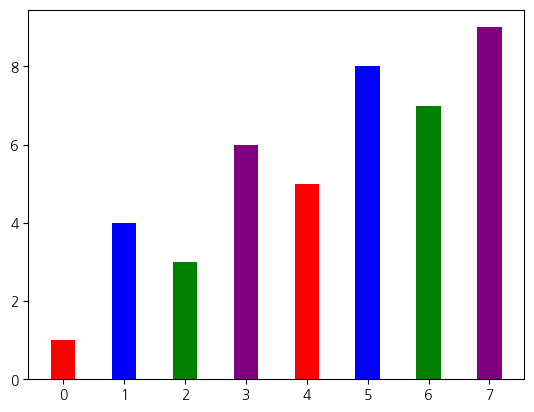

In [ ]:
"""
bar 스타일(width, color, linewidth)
bar의 두께를 설정할 수 있다. 각 데이터마다 다른 값을 주면 각각 다르게 설정할 수도 있다.
"""
plt.bar(data.index, data['A'], width=0.4, color=["red", "blue", "green", "purple", "red", "blue", "green", "purple"], linewidth=2.5)

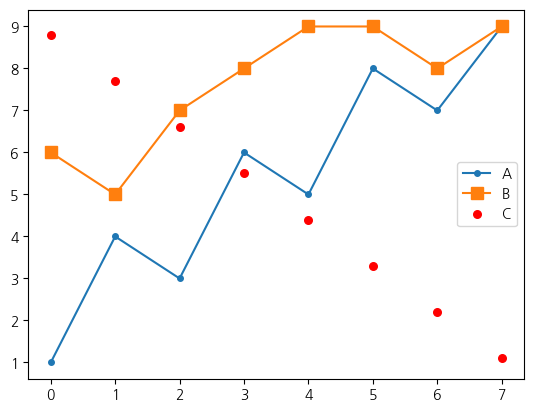

In [ ]:
"""
각 data point마다 marker를 표시할 수 있다.

점: ., 원: o, 사각형: s, 별: *, 다이아몬드: D, d
marker의 사이즈도 markersize parameter로 지정할 수 있다.
산점도(scatter)의 마커 크기는 s parameter로 설정한다. 단 크기가 10배 차이난다.
"""

plt.plot(data['A'], label='A', marker='o', markersize=4)
plt.plot(data['B'], label='B', marker='s', markersize=8)
plt.scatter(data.index, data['C'], label='C', marker='.', s=120, color='red')
plt.legend()

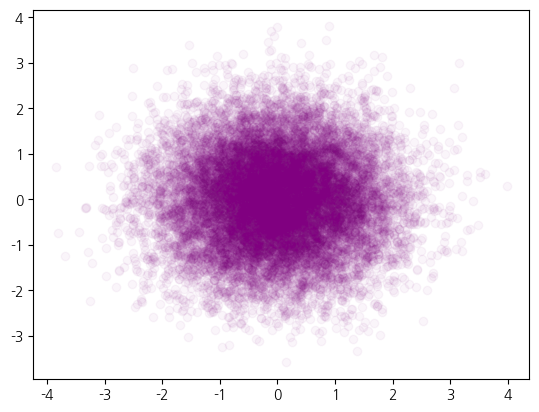

In [ ]:
"""
투명도(alpha)
데이터가 너무 많은 경우 투명도를 조절하면 좀 더 잘 보이게 할 수 있다.
"""

import numpy as np
x = np.random.normal(0, 1, 16384)
y = np.random.normal(0, 1, 16384)
plt.scatter(x, y, alpha = 0.04, color='purple')

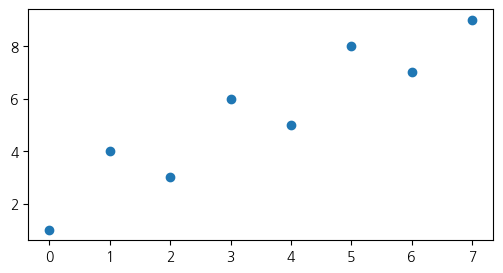

In [ ]:
#그래프 크기 설정

plt.figure(figsize=(6, 3))
plt.scatter(x=data.index, y=data['A'])

Text(0.5, 1.0, 'Gorio')

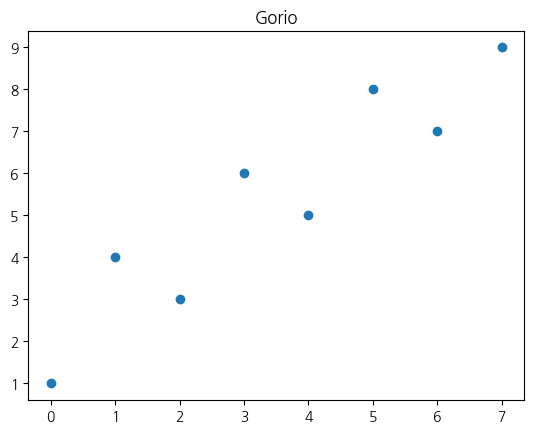

In [ ]:
# 그래프 제목(title)
plt.scatter(x=data.index, y=data['A'])
plt.title("Gorio")

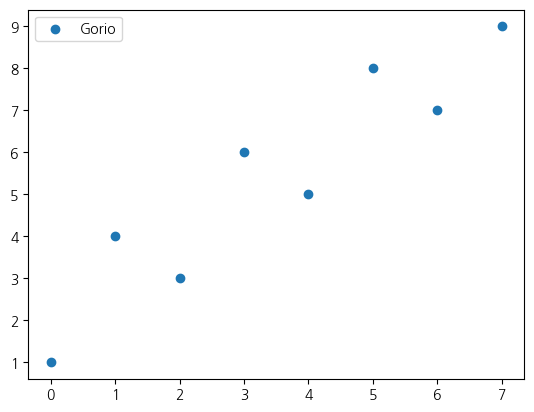

In [ ]:
# 범례 설정(legend)
# 기본적으로 plot(label=...) 등으로 label을 등록하면, plt.legend()로 등록된 label들을 표시해주는 개념이다.

plt.scatter(x=data.index, y=data['A'], label='Gorio')
plt.legend()

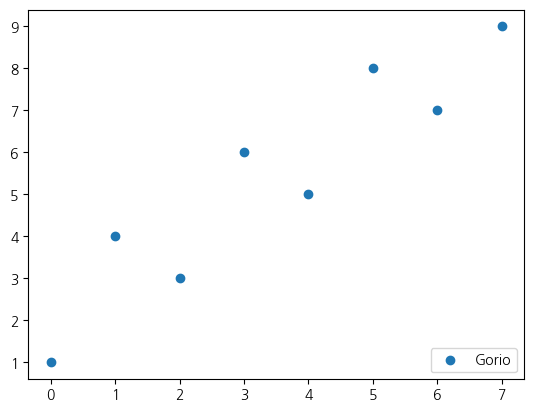

In [ ]:
# legend 위치는 그래프를 가리지 않는 위치에 임의로 생성된다. 위치를 지정하려면 loc parameter를 설정한다.

plt.scatter(x=data.index, y=data['A'], label='Gorio')
plt.legend(loc='lower right')

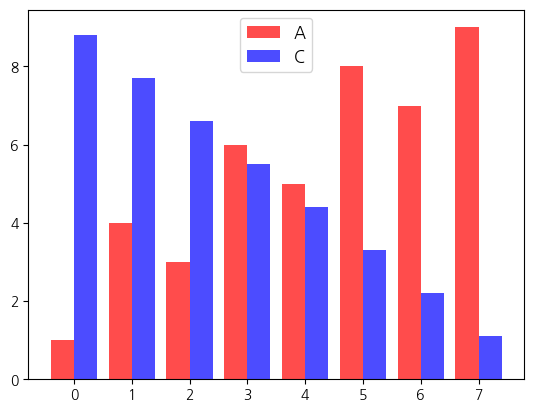

In [ ]:
# legend() 메서드에서도 label을 직접 등록하여 표시할 수 있다.

p1 = plt.bar(data.index-0.2, data['A'], color='red', alpha=0.7, width=0.4)
p2 = plt.bar(data.index+0.2, data['C'], color='blue', alpha=0.7, width=0.4)
plt.legend((p1, p2), ('A', 'C'), fontsize=12)

Text(0, 0.5, 'y axis')

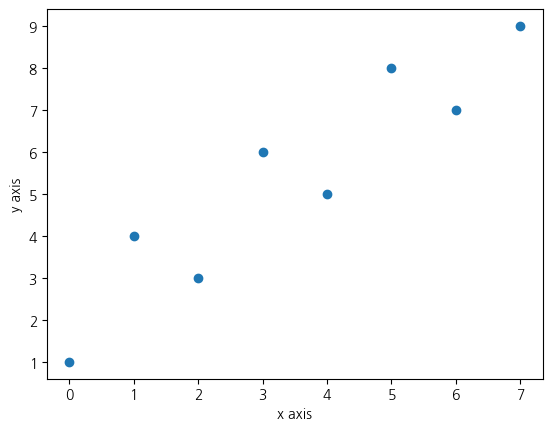

In [ ]:
# 축 제목(xlabel, ylabel)
plt.scatter(x=data.index, y=data['A'])
plt.xlabel("x axis")
plt.ylabel("y axis")

Text(0, 0.5, 'y axis')

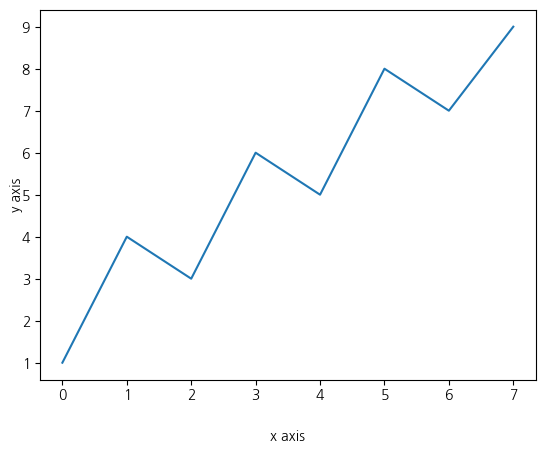

In [ ]:
# 축 제목과 축 간 거리는 labelpad로 조정한다.

plt.plot(data.index, data['A'])
plt.xlabel("x axis", labelpad=20)
plt.ylabel("y axis", labelpad=-1)

Text(0, 0.5, 'y Axis')

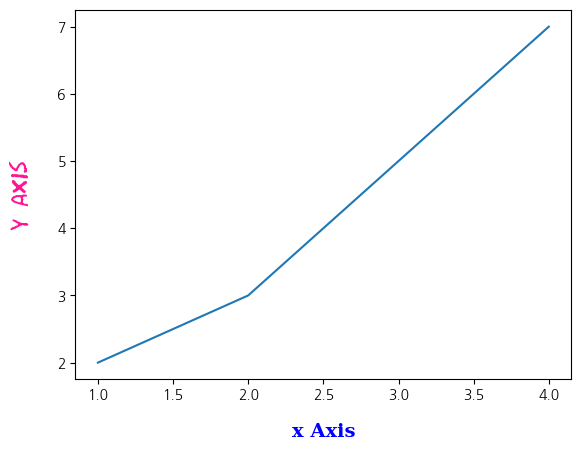

In [ ]:
# 폰트 설정도 할 수 있다.

font1 = {'family': 'serif',
         'color': 'b',
         'weight': 'bold',
         'size': 14
         }

font2 = {'family': 'fantasy',
         'color': 'deeppink',
         'weight': 'normal',
         'size': 'xx-large'
         }

plt.plot([1, 2, 3, 4], [2, 3, 5, 7])
plt.xlabel('x Axis', labelpad=15, fontdict=font1)
plt.ylabel('y Axis', labelpad=20, fontdict=font2)

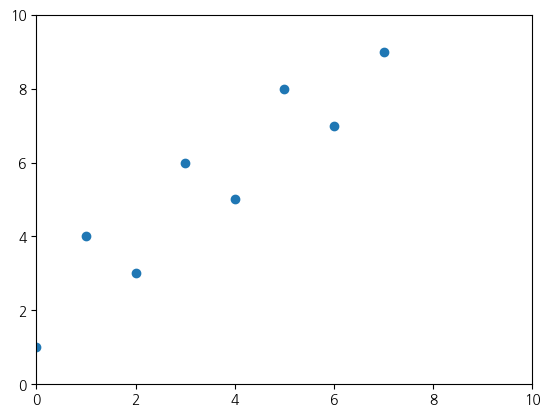

In [ ]:
# 축 범위 설정(xlim, ylim, axis)
# 각 함수를 호출하면 return value로 x축, y축, x 및 y축의 최솟값/최댓값을 얻을 수 있다.

plt.scatter(x=data.index, y=data['A'])
xmin, xmax = plt.xlim(left=0, right=10)
ymin, ymax = plt.ylim(bottom=0, top=10)
# 아래 한 줄로도 쓸 수 있다.
# xmin, xmax, ymin, ymax = plt.axis([0,10,0,10])

(0.0, 10.0)

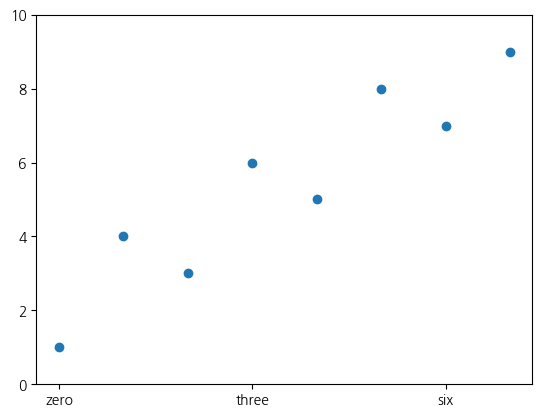

In [ ]:
# 눈금 값 설정(xticks, yticks)
# ticks에 tick의 위치를 지정하고, labels에 원하는 tick 이름을 지정할 수 있다.

plt.scatter(x=data.index, y=data['A'])
plt.xticks(ticks=[0,3,6], labels=['zero', 'three', 'six'])
plt.ylim(bottom=0, top=10)


(0.0, 10.0)

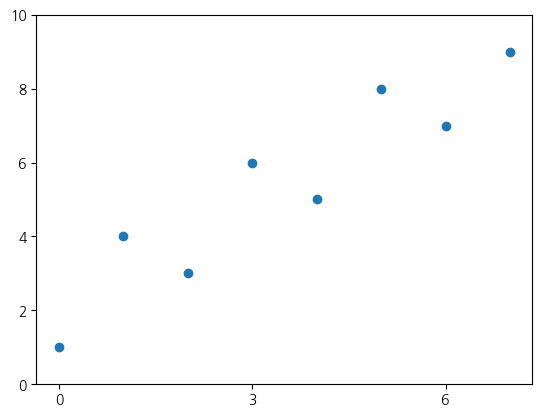

In [ ]:
# xticks나 yticks에 값을 1개만 주면 ticks parameter가 설정된다.

plt.scatter(x=data.index, y=data['A'])
plt.xticks([0,3,6])
plt.ylim(bottom=0, top=10)

([<matplotlib.axis.XTick at 0x7b8e3557dab0>,
 [Text(0, 0, 'zero'), Text(3, 0, 'three'), Text(6, 0, 'six')])

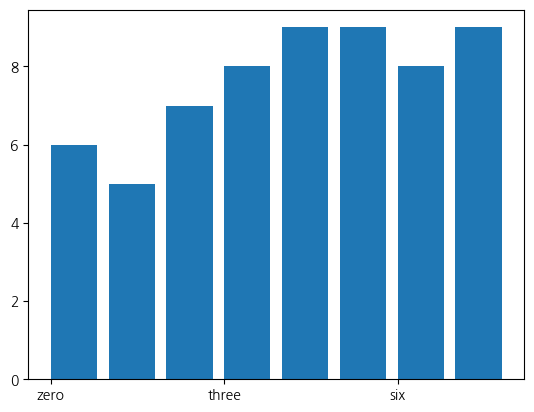

In [ ]:
plt.bar(data.index, data['B'], align='edge')
plt.xticks([0,3,6], ['zero', 'three', 'six'])


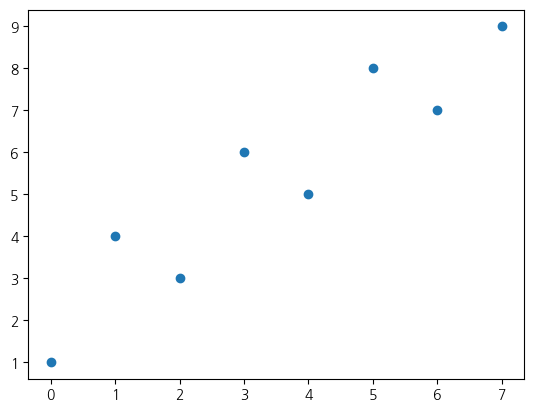

In [ ]:
# 그래프 저장(savefig)

plt.scatter(x=data.index, y=data['A'])
plt.savefig("gorio.png", dpi=300)